In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [130]:
features = pd.read_csv('dengue_features_train.csv')
labels = pd.read_csv('dengue_labels_train.csv')

In [131]:
data = pd.merge(features, labels, on=['city', 'year', 'weekofyear'])

Number of NaNs in each column

In [132]:
nullCounts = data.isnull().sum()

Select columns with null counts

In [133]:
nullCols = nullCounts[nullCounts > 1].keys()

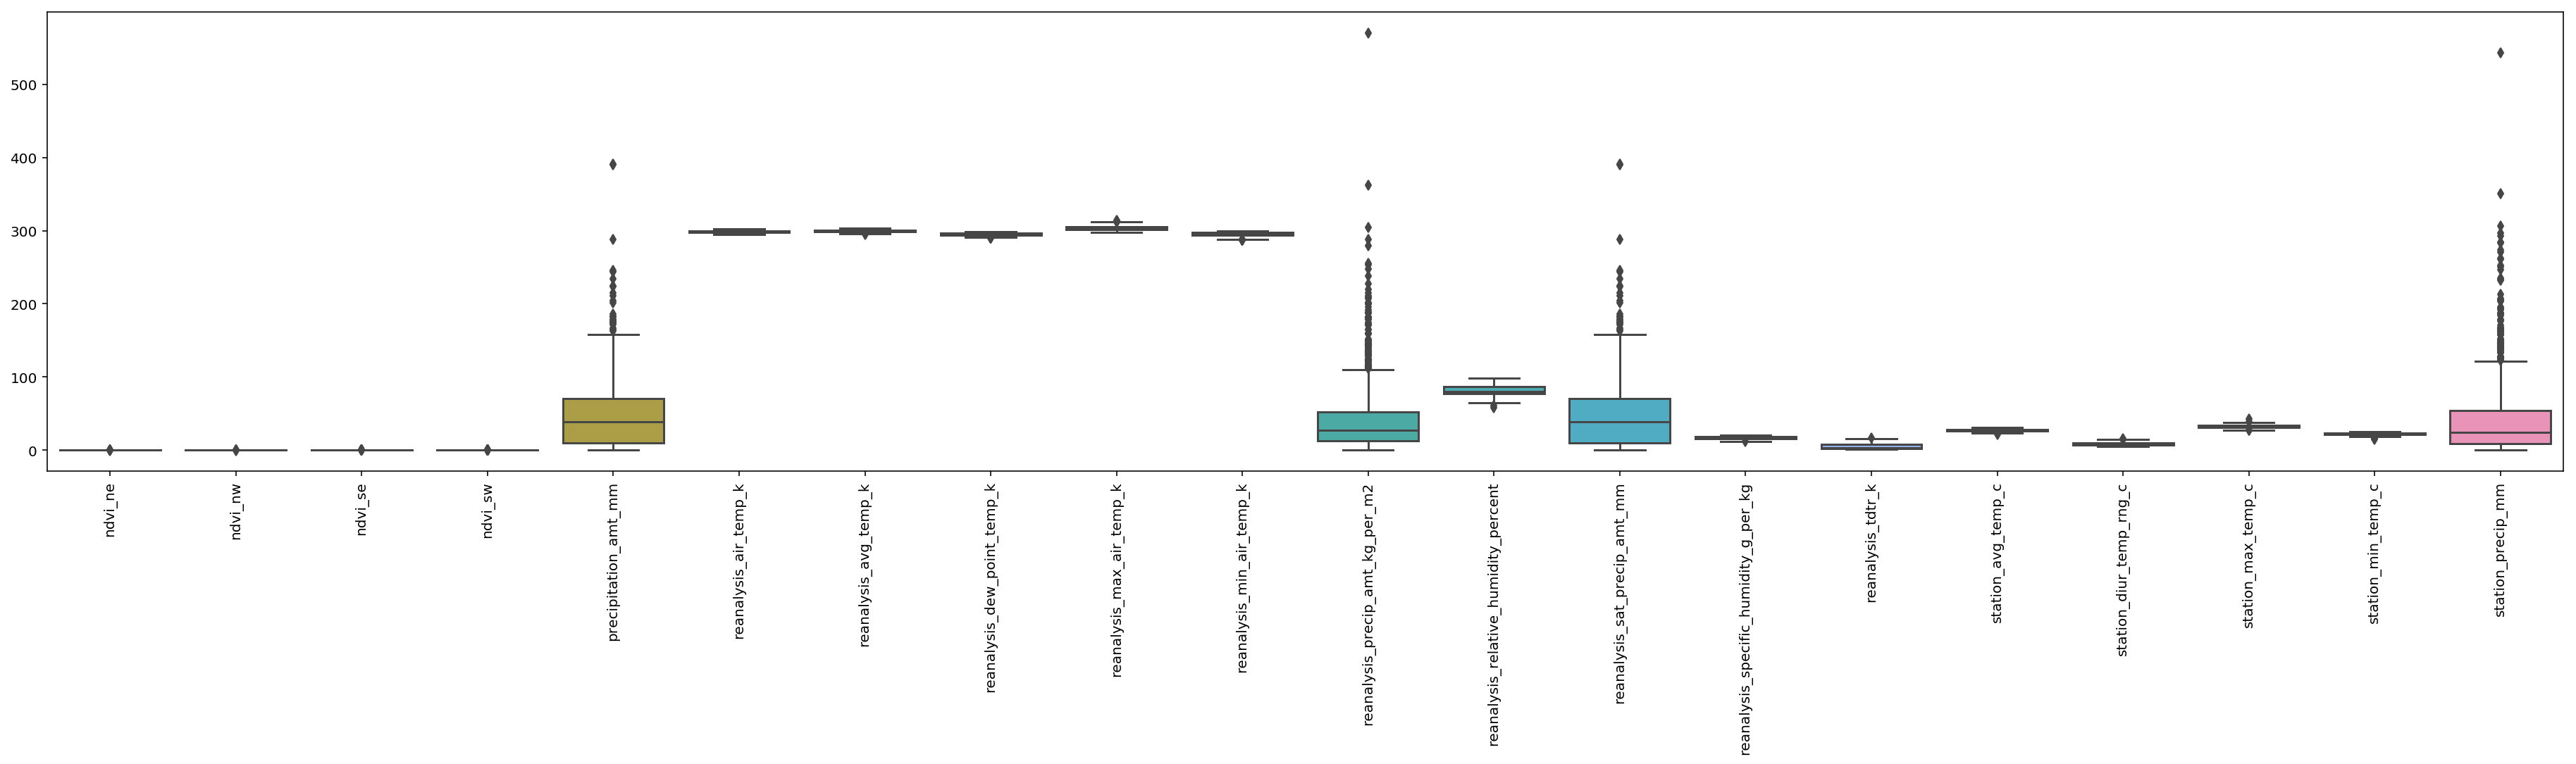

In [134]:
f, ax = plt.subplots(figsize=(32,6))
sns.boxplot(data=data[nullCols], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [135]:
nullColsSumm = data[nullCols].describe().T
nullColsSumm.sort_values(by=['std'], ascending=False).head(5)

,count,mean,std,min,25%,50%,75%,max
station_precip_mm,1434.0,39.326360,47.455314,0.000000,8.700000,23.850000,53.900000,543.30
precipitation_amt_mm,1443.0,45.760388,43.715537,0.000000,9.800000,38.340000,70.235000,390.60
reanalysis_sat_precip_amt_mm,1443.0,45.760388,43.715537,0.000000,9.800000,38.340000,70.235000,390.60
reanalysis_precip_amt_kg_per_m2,1446.0,40.151819,43.434399,0.000000,13.055000,27.245000,52.200000,570.50
reanalysis_relative_humidity_percent,1446.0,82.161959,7.153897,57.787143,77.177143,80.301429,86.357857,98.61


In [136]:
nullColsSumm[nullColsSumm['std'] > 20]

,count,mean,std,min,25%,50%,75%,max
precipitation_amt_mm,1443.0,45.760388,43.715537,0.0,9.800,38.340,70.235,390.6
reanalysis_precip_amt_kg_per_m2,1446.0,40.151819,43.434399,0.0,13.055,27.245,52.200,570.5
reanalysis_sat_precip_amt_mm,1443.0,45.760388,43.715537,0.0,9.800,38.340,70.235,390.6
station_precip_mm,1434.0,39.326360,47.455314,0.0,8.700,23.850,53.900,543.3


In [137]:
from sklearn.preprocessing import Imputer

In [138]:
imp = Imputer(strategy='median')
data_imputed = imp.fit_transform(data[nullCols])

data[nullCols] = data_imputed

In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
scaler = StandardScaler()

data_float = data.select_dtypes(include=['float64'])
data_float_cols = data_float.columns
data_float_scaled = scaler.fit_transform(data_float)

data[data_float_cols] = data_float_scaled

In [141]:
# sns.pairplot(data[data_float_cols])

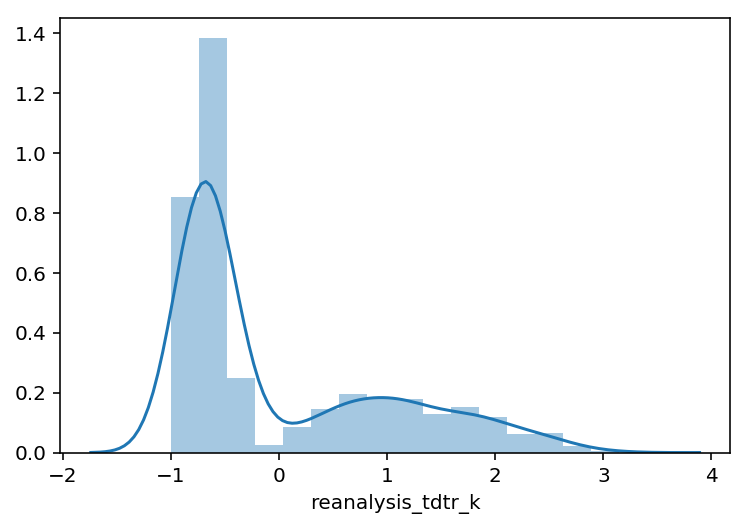

In [142]:
sns.distplot(data['reanalysis_tdtr_k'])

In [143]:
city = pd.get_dummies(data['city'], prefix='city')
_data = data.drop(columns=['city'])
data = pd.concat([_data, city], axis=1)

In [145]:
import pickle
file = open('cleansed_data.pickle', 'wb')
pickle.dump(data, file)
file.close()